In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/Users/tushuyang/opt/miniconda3/envs/daily/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

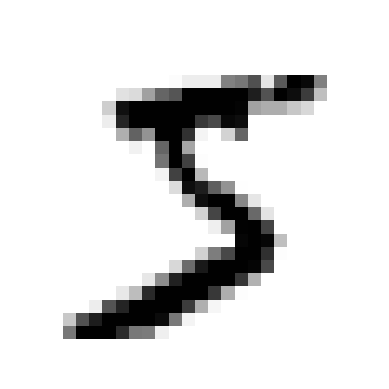

In [4]:
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap ='binary', interpolation="nearest")
    plt.axis("off")
    
plot_digit(X_train[0])

/var/folders/x1/x95m9hrx431cc08rh8f3cs_c0000gp/T/ipykernel_80538/551636025.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


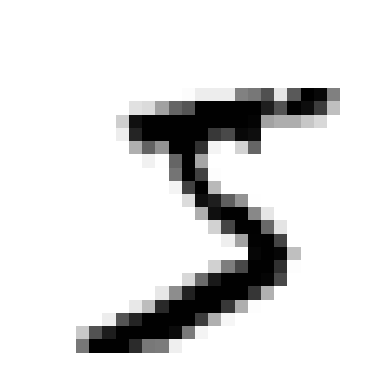

In [6]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

plot_digit(shift_image(X_train[0], 1, 1))

In [7]:
X_train_shifted = [shift_image(image, 1, 1) for image in X_train]

In [8]:
import numpy as np

X_train_augmented = np.concatenate((X_train, X_train_shifted)).astype(np.int32)

In [10]:
y_train_augmented = np.concatenate((y_train, y_train))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(weights='distance')
params_grid = {'n_neighbors': range(3, 10)}

grid_search = GridSearchCV(knn, params_grid, cv=3)

grid_search.fit(X_train_augmented, y_train_augmented)